In [30]:
from elliot_utils import *
from scipy import stats

In [31]:
analysisPath = Path.cwd().joinpath('analysis_files/polyamine_assays/')
figPath = Path.cwd().joinpath('figures/polyamine_assays/')

In [3]:
# Graph the results from the pilot assay on 4/4/23 and the follow-up on 4/7/23
data4723 = pd.read_csv(analysisPath.joinpath('4-7-23.csv'))

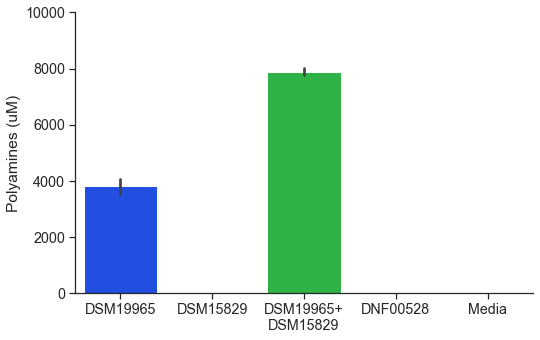

In [4]:
plot4723 = sns.catplot(data=data4723, x='Isolate', y='Polyamines (uM)', kind='bar', aspect=1.5)
plot4723.set(xlabel='', ylim=(0, 10000))
plot4723.savefig(figPath.joinpath('4-7-23.png'), bbox_inches='tight', dpi=300)

In [5]:
# Graph the combined results from the pilot assay on 4/4/23, the follow-up on 4/7/23, and the follow-up-follow-up on 4/11/23
data41123 = pd.read_csv(analysisPath.joinpath('4-11-23.csv'))

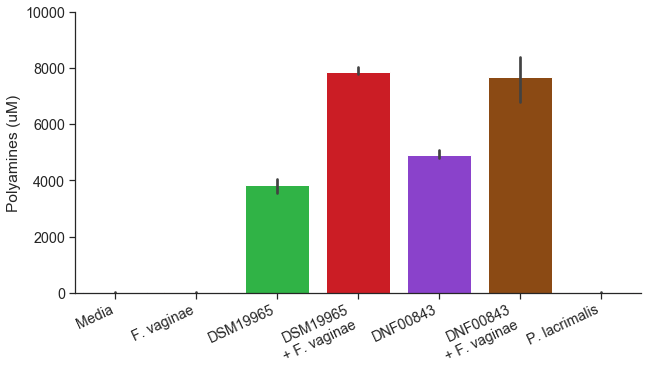

In [16]:
plotOrder = ['Media', 'DSM15829', 'DSM19965', 'DSM19965+\nDSM15829', 'DNF00843', 'DNF00843+\nDSM15829', 'DNF00528']
plot41123 = sns.catplot(data=data41123, x='Isolate', y='Polyamines (uM)', order=plotOrder, kind='bar', aspect=1.8)
plot41123.set(xlabel='', ylim=(0, 10000))
plot41123.set_xticklabels(['Media', 'F. vaginae', 'DSM19965', 'DSM19965\n+ F. vaginae', 'DNF00843', 'DNF00843\n+ F. vaginae', 'P. lacrimalis'], rotation=25, ha='right')
plot41123.savefig(figPath.joinpath('4-11-23.png'), bbox_inches='tight', dpi=300)

In [4]:
# Graph the results of the assay I performed on 5-11-23
data51123 = pd.read_csv(analysisPath.joinpath('5-11-23.csv'))

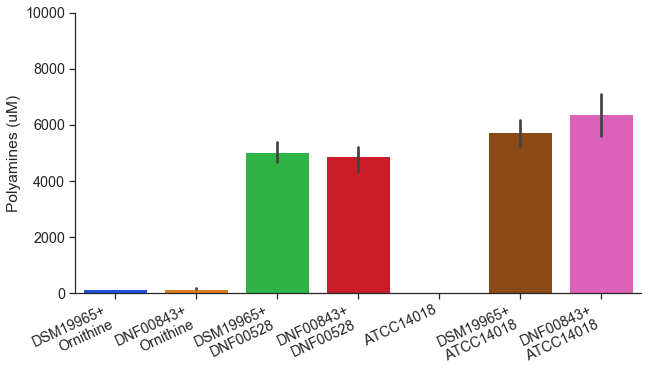

In [10]:
plotOrder = ['DSM19965+\nOrnithine', 'DNF00843+\nOrnithine', 'DSM19965+\nDNF00528', 'DNF00843+\nDNF00528', 'ATCC14018', 'DSM19965+\nATCC14018', 'DNF00843+\nATCC14018']
plot51123 = sns.catplot(data=data51123, x='Isolate', y='Polyamines (uM)', order=plotOrder, kind='bar', aspect=1.8)
plot51123.set_xticklabels(rotation=25, ha='right')
plot51123.set(xlabel='', ylim=(0, 10000))
plot51123.savefig(figPath.joinpath('5-11-23.png'), bbox_inches='tight', dpi=300)

In [33]:
# Graph all the results together
aggregateData = pd.read_csv(analysisPath.joinpath('aggregate_results.csv'))

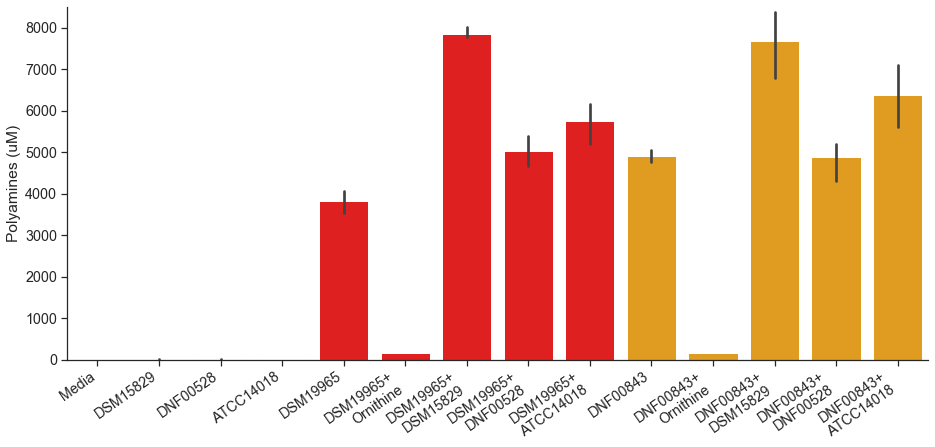

In [35]:
plotOrder = ['Media', 'DSM15829', 'DNF00528', 'ATCC14018', 'DSM19965', 'DSM19965+\nOrnithine', 'DSM19965+\nDSM15829', 'DSM19965+\nDNF00528', 'DSM19965+\nATCC14018', 'DNF00843', 'DNF00843+\nOrnithine', 'DNF00843+\nDSM15829',  'DNF00843+\nDNF00528', 'DNF00843+\nATCC14018']
plotColors = ['black', 'black', 'black', 'black', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']
aggregatePlot = sns.catplot(data=aggregateData, x='Isolate', y='Polyamines (uM)', order=plotOrder, kind='bar', aspect=2.2, height=6, palette=plotColors)
aggregatePlot.set_xticklabels(rotation=35, ha='right')
aggregatePlot.set(xlabel='', ylim=(0, 8500))
aggregatePlot.savefig(figPath.joinpath('aggregate_result_5-11.png'), bbox_inches='tight', dpi=300)

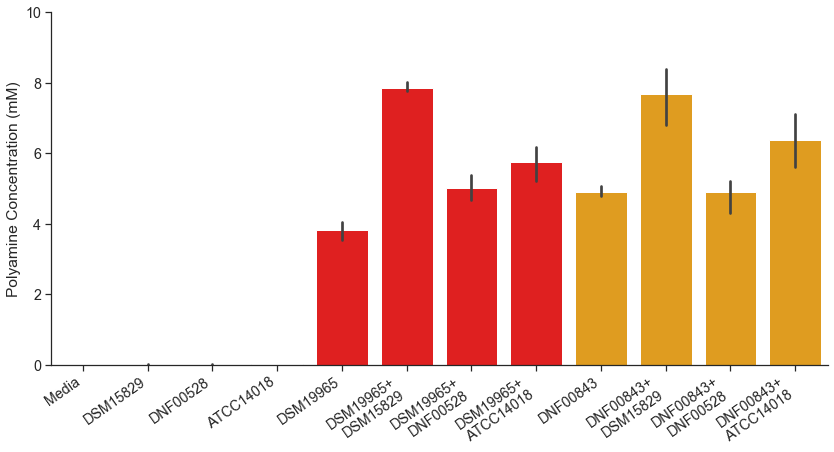

In [37]:
plotOrder = ['Media', 'DSM15829', 'DNF00528', 'ATCC14018', 'DSM19965', 'DSM19965+\nDSM15829', 'DSM19965+\nDNF00528', 'DSM19965+\nATCC14018', 'DNF00843', 'DNF00843+\nDSM15829',  'DNF00843+\nDNF00528', 'DNF00843+\nATCC14018']
plotColors = ['black', 'black', 'black', 'black', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange']
aggregatePlot = sns.catplot(data=aggregateData, x='Isolate', y='Polyamines (uM)', order=plotOrder, kind='bar', aspect=2, height=6, palette=plotColors)
aggregatePlot.set_xticklabels(rotation=35, ha='right')
aggregatePlot.set_yticklabels(['0', '2', '4', '6', '8', '10'])
aggregatePlot.set(xlabel='', ylabel='Polyamine Concentration (mM)', ylim=(0, 10000))
aggregatePlot.savefig(figPath.joinpath('aggregate_result_5-24.png'), bbox_inches='tight', dpi=300)

In [30]:
# Test whether there are differences in polyamine concentration between the mono- and co-cultures for each isolate w/ welch's t test
dataDict = {} #key=culture name, value=list of polyamine concentrations
for x in plotOrder:
    dataDict[x] = []
for index, row in aggregateData.iterrows():
    dataDict[row['Isolate']].append(row['Polyamines (uM)'])

In [32]:
for key, dataList in dataDict.items():
    if key != 'DSM19965' and key.find('DSM19965') != -1:
        res = stats.ttest_ind(dataDict['DSM19965'], dataList, equal_var=False)
        print(f'DSM19965 vs {key}')
        print(res)

DSM19965 vs DSM19965+
Ornithine
Ttest_indResult(statistic=23.820964979069768, pvalue=0.0017494698851652614)
DSM19965 vs DSM19965+
DSM15829
Ttest_indResult(statistic=-23.22080868119469, pvalue=0.00016956380041806192)
DSM19965 vs DSM19965+
DNF00528
Ttest_indResult(statistic=-4.590532150147215, pvalue=0.012402944392065181)
DSM19965 vs DSM19965+
ATCC14018
Ttest_indResult(statistic=-5.966423834849434, pvalue=0.008724565109357613)


In [34]:
for key, dataList in dataDict.items():
    if key != 'DNF00843' and key.find('DNF00843') != -1:
        res = stats.ttest_ind(dataDict['DNF00843'], dataList, equal_var=False)
        print(f'DNF00843 vs {key}')
        print(res)

DNF00843 vs DNF00843+
Ornithine
Ttest_indResult(statistic=55.418935128458926, pvalue=0.00030395695626859445)
DNF00843 vs DNF00843+
DSM15829
Ttest_indResult(statistic=-5.817460306189713, pvalue=0.024352341444934693)
DNF00843 vs DNF00843+
DNF00528
Ttest_indResult(statistic=0.06051303465776212, pvalue=0.9565334464346495)
DNF00843 vs DNF00843+
ATCC14018
Ttest_indResult(statistic=-3.302480049540024, pvalue=0.07306214367990699)


In [38]:
# Graph the results of the Polyamine metabolomics by LC-MS/MS
metabolomicsData = pd.read_csv(analysisPath.joinpath('targeted_metabolomics.csv'))

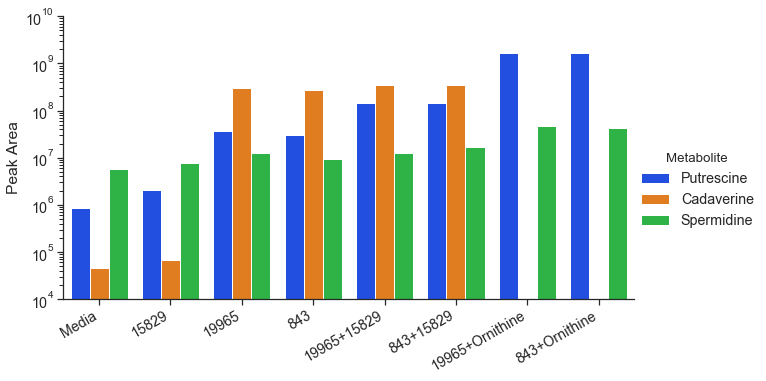

In [46]:
# Plot peak areas
plot = sns.catplot(data=metabolomicsData, x='Sample', y='Peak Area', hue='Metabolite', kind='bar', aspect=1.8)
plot.set(yscale='log', ylim=(1e4, 1e10), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics.png'), bbox_inches='tight', dpi=300)

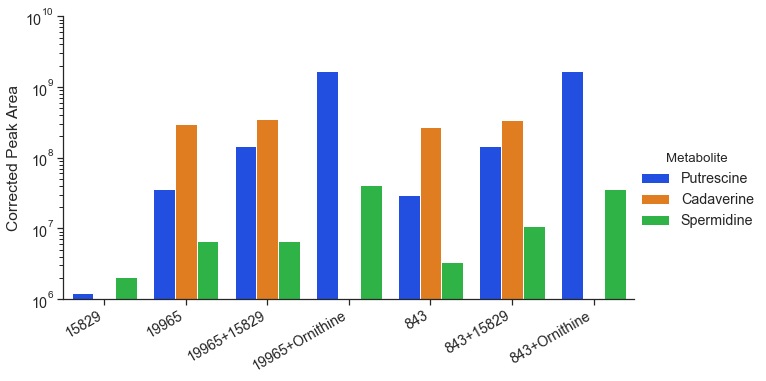

In [45]:
# Plot peak areas corrected against the media controls
plotOrder = ['15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plot = sns.catplot(data=metabolomicsData, x='Sample', y='Corrected Peak Area', hue='Metabolite', kind='bar', order=plotOrder, aspect=1.8)
plot.set(yscale='log', ylim=(1e6, 1e10), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_corrected.png'), bbox_inches='tight', dpi=300)

In [39]:
# Function to extract data from the metabolomics data so I can make a separate graph for each metabolite
# Returns a DataFrame with 'Sample' and 'Corrected Peak Area' values
def extractFromDF(dataFrame, metabolite):
    toReturn = {'Sample':[], 'Peak Area':[]}
    for index, row in dataFrame.iterrows():
        if row['Metabolite'] == metabolite:
            toReturn['Sample'].append(row['Sample'])
            toReturn['Peak Area'].append(row['Peak Area'])
    return pd.DataFrame(toReturn)

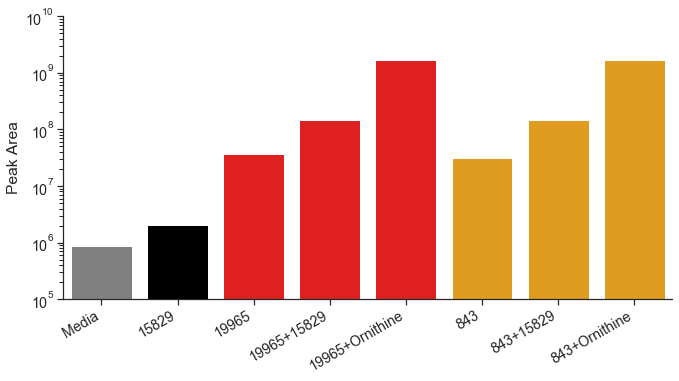

In [46]:
putrescineDF = extractFromDF(metabolomicsData, 'Putrescine')
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plot = sns.catplot(data=putrescineDF, x='Sample', y='Peak Area', kind='bar', order=plotOrder, aspect=1.9, palette=plotColors)
plot.set(yscale='log', ylim=(1e5, 1e10), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_putrescine.png'), bbox_inches='tight', dpi=300)

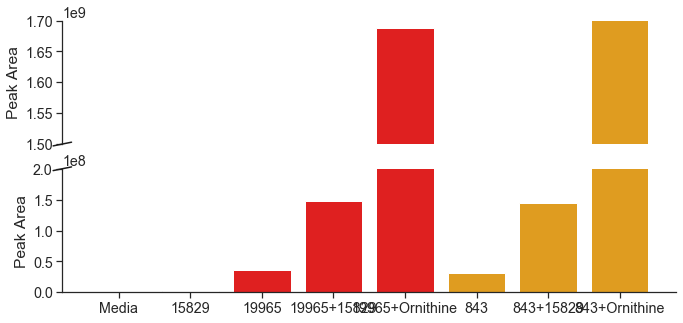

In [62]:
# Make a linear scale putrescine plot with a broken y-axis
putrescineDF = extractFromDF(metabolomicsData, 'Putrescine')
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(11, 5))
ax = sns.barplot(data=putrescineDF, x='Sample', y='Peak Area', order=plotOrder, palette=plotColors, ax=ax_top)
ax = sns.barplot(data=putrescineDF, x='Sample', y='Peak Area', order=plotOrder, palette=plotColors, ax=ax_bottom)

ax_top.set_ylim(1.5e9, 1.7e9)
ax_top.set_xlabel('')
ax_top.tick_params(bottom=False)
ax_bottom.set_ylim(0, 2e8)
ax_bottom.set_xlabel('')

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#pHax = plot.axes[0]
#pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plt.savefig(figPath.joinpath('targeted_metabolomics_putrescine_linear.png'), bbox_inches='tight', dpi=300)

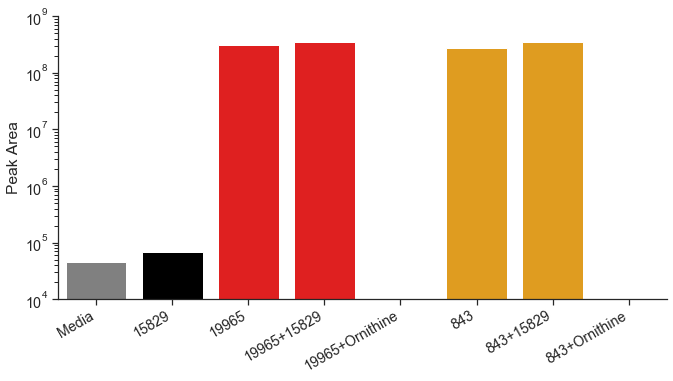

In [47]:
putrescineDF = extractFromDF(metabolomicsData, 'Cadaverine')
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plot = sns.catplot(data=putrescineDF, x='Sample', y='Peak Area', kind='bar', order=plotOrder, aspect=1.9, palette=plotColors)
plot.set(yscale='log', ylim=(1e4, 1e9), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_cadaverine.png'), bbox_inches='tight', dpi=300)

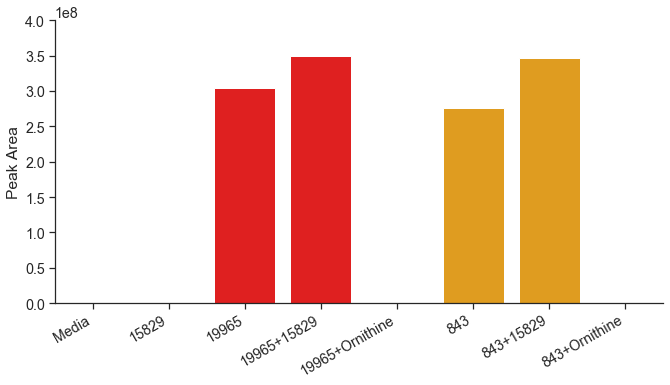

In [51]:
putrescineDF = extractFromDF(metabolomicsData, 'Cadaverine')
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plot = sns.catplot(data=putrescineDF, x='Sample', y='Peak Area', kind='bar', order=plotOrder, aspect=1.9, palette=plotColors)
plot.set(ylim=(0, 4e8), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_cadaverine_linear.png'), bbox_inches='tight', dpi=300)

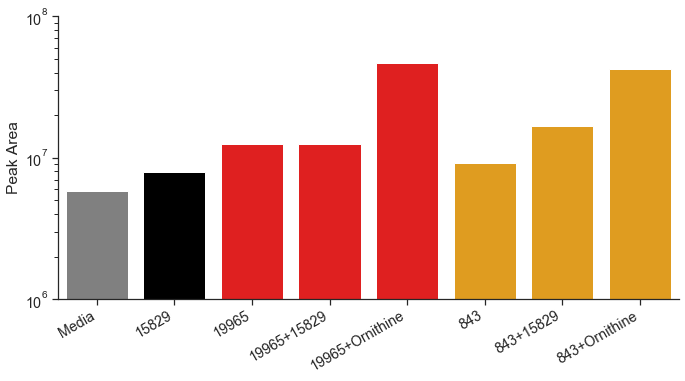

In [48]:
spermidineDF = extractFromDF(metabolomicsData, 'Spermidine')
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plot = sns.catplot(data=spermidineDF, x='Sample', y='Peak Area', kind='bar', order=plotOrder, aspect=1.9, palette=plotColors)
plot.set(yscale='log', ylim=(1e6, 1e8), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_spermidine.png'), bbox_inches='tight', dpi=300)

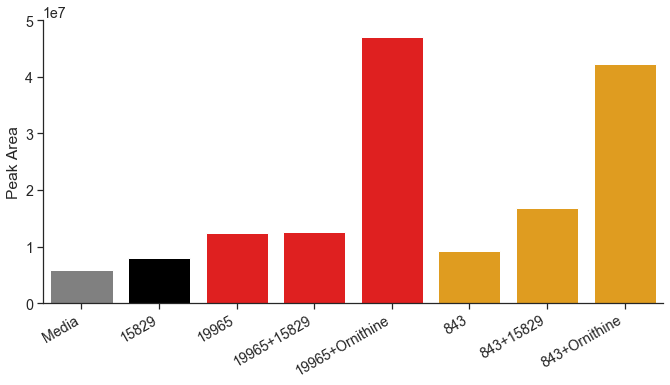

In [55]:
spermidineDF = extractFromDF(metabolomicsData, 'Spermidine')
plotOrder = ['Media', '15829', '19965', '19965+15829', '19965+Ornithine', '843', '843+15829', '843+Ornithine']
plotColors = ['gray', 'black', 'red', 'red', 'red', 'orange', 'orange', 'orange']
plot = sns.catplot(data=spermidineDF, x='Sample', y='Peak Area', kind='bar', order=plotOrder, aspect=1.9, palette=plotColors)
plot.set(ylim=(0, 5e7), xlabel='')
pHax = plot.axes[0]
pHax[0].set_xticklabels(pHax[0].get_xticklabels(), rotation=30, ha='right')
plot.savefig(figPath.joinpath('targeted_metabolomics_spermidine_linear.png'), bbox_inches='tight', dpi=300)